# ANIME RECOMMENDER SYSTEM - EDA (EXPLORATORY DATA ANALYSIS)
## Anime Recommender System based on content and collaborative filtering

### With our cleaned dataset, lets analyze the data.

### Objective: 
- How rating distributed?
- What the most popular anime?
- What the most rated anime?

## TABLE OF CONTENT
- EXPLORATORY DATA ANALYSIS (EDA)

In [1]:
# basic library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
anime_full = pd.read_csv('dataset/exported_dataset/anime_full.csv')
anime_subset = pd.read_csv('dataset/exported_dataset/anime_subset.csv')
rating_df = pd.read_csv('dataset/exported_dataset/rating_df.csv')

# EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
anime_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       17562 non-null  int64  
 1   Name           17562 non-null  object 
 2   Score          12421 non-null  float64
 3   Genres         17499 non-null  object 
 4   English name   6997 non-null   object 
 5   Japanese name  17514 non-null  object 
 6   Type           17525 non-null  object 
 7   Episodes       17046 non-null  float64
 8   Aired          17253 non-null  object 
 9   Premiered      4745 non-null   object 
 10  Producers      9768 non-null   object 
 11  Licensors      3946 non-null   object 
 12  Studios        10483 non-null  object 
 13  Source         13995 non-null  object 
 14  Duration       17007 non-null  object 
 15  age_rating     16874 non-null  object 
 16  Ranked         15800 non-null  float64
 17  Popularity     17562 non-null  int64  
 18  Member

In [4]:
anime_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    17562 non-null  int64  
 1   Name        17562 non-null  object 
 2   Score       12421 non-null  float64
 3   Genres      17499 non-null  object 
 4   Type        17525 non-null  object 
 5   Studios     10483 non-null  object 
 6   Source      13995 non-null  object 
 7   age_rating  16874 non-null  object 
 8   sypnopsis   15497 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


In [5]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


In [6]:
anime_full.head()

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1.0,"Sep 1, 2001",NaN,...,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26.0,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,It is the dark century and the people are suff...


In [7]:
import itertools
import collections

# function to split:
def split(col):
    anime_full[col].replace({'Unknown: np.nan'}, inplace=True)
    anime_full[col] = anime_full[col].fillna('')

    # split
    anime_full[col] = anime_full[col].apply(lambda x: x.split(', '))

In [8]:
col_list = ['Genres', 'Producers', 'Licensors', 'Studios']
for i in col_list:
    split(i)

## essential function for analysis/visualisation:

In [9]:
# print average
def printAvg(df, col):
    print("Average: " + str(df[col].mean()))

In [10]:
# kdeplot figure
def fig_kdeplot(df, col, title):
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    ax = df[col].hist(bins=50, density=True, alpha=0.5, color='purple')
    ax = sns.kdeplot(data=df, x=col, shade=False, alpha=0.9, linewidth=3)
    ax.set_title(title, fontsize=24)
    plt.show()

In [11]:
# plot comma seperated list
def fig_comma_list(df, col, title): 
    # count
    flat = itertools.chain(*df[col].values.tolist())
    count = collections.Counter(flat)

    plot = pd.DataFrame.from_dict(count, orient='index').reset_index().rename(columns={'index':col, 0:'count'})
    plot.sort_values('count', ascending=False, inplace=True)

    # plot
    fig = plt.figure(figsize=(12,10))
    fig.set_facecolor('white')
    ax = sns.barplot(data=plot, x='count', y=col, palette='Set2')
    ax.set_title(title, fontsize=24)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
    plt.show()

In [12]:
# countplot figure
def fig_countplot(df, col, sort, title, rotate):
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    if (sort): ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    else: ax = sns.countplot(data=df, x=col, palette='Set2')
    ax.set_title(title, fontsize=20)
    if(rotate): ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=14)
    else: ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
    plt.show()

In [13]:
# boxplot figure
def fig_boxplot(df,col, title):
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    ax = sns.boxplot(df[col])
    ax.set_title(title, fontsize=24)
    plt.show()

In [14]:
# top 10 barplot figure
def fig_topn_barplot(df, name, col, n, title):   
    temp = anime_full.nlargest(n, [col])
    temp = temp[[name, col]]

    # plot
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    ax = sns.barplot(data=temp, x=col, y=name, palette='Set2')
    ax.set_title(title, fontsize=24)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
    plt.show()

## ANALYSIS

### Analysis on 'Score'
Score is Anime rating counts from user given rating. 
### Q: How Score vary on anime titles? whats the average of the Score?

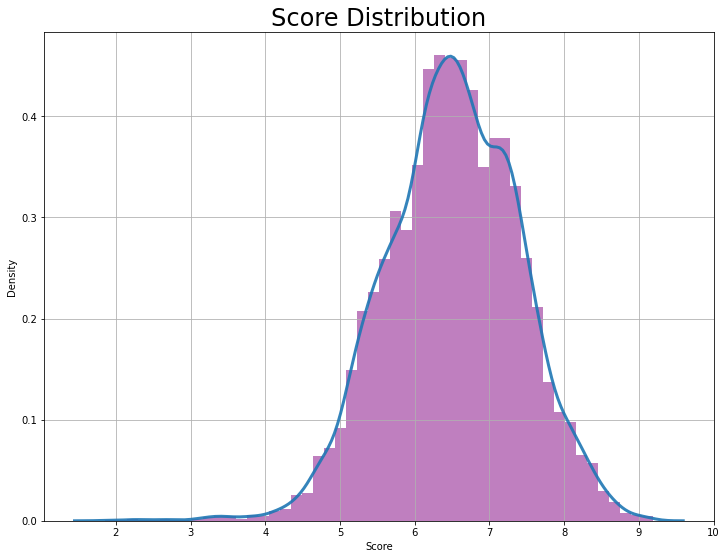

Average: 6.509999194911844


In [15]:
fig_kdeplot(anime_full, 'Score', 'Score Distribution')
printAvg(anime_full, 'Score')

'Score' has Normal/Gaussian Distribution, averaged on 6.5.

### Analysis on 'Genres'
Genres is Comma seperated list of genre of anime, which mean one anime titles may have more than one genres. 
### Q: How many Genres are there? Whats the most popular Genres?

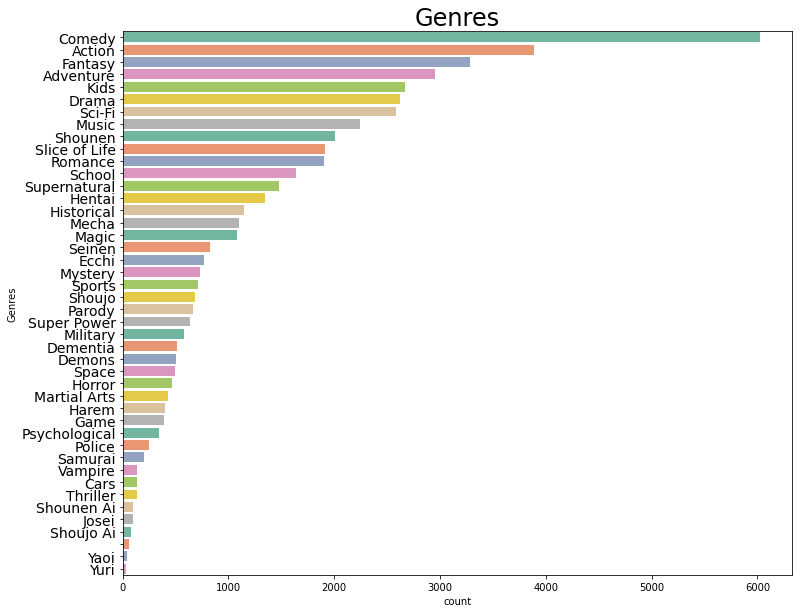

In [17]:
fig_comma_list(anime_full, 'Genres', 'Genres')

there are 43 Genres with Comedy, Action, and Fantasy being the most popular Genre.

### Analysis on 'Type'
Type represent the type of Anime. Anime has various show type, for example, TV (Anime that broadcast on TV(series)), Movie (1 episodes, usualy broadcast on cinemas), etc.
### Q: What is the most popular type?

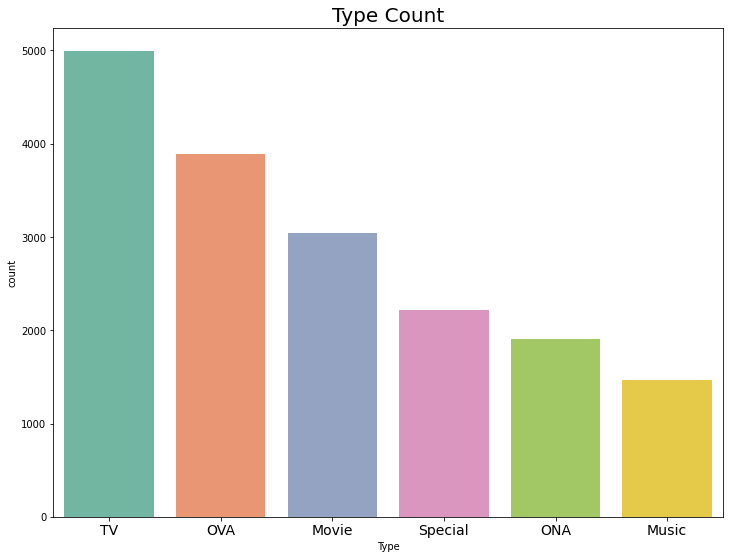

In [18]:
fig_countplot(anime_full, 'Type', True, 'Type Count', False)

The most popular Type was TV, and the least popular Type was Music.
Here are some description for each type:
- TV        : Anime series, broadcasted on TV weekly and seasonal
- OVA       : OVA Stands for Original Video Animation. Usually not broadcasted and sold as a single product, it usually a bonus show for a TV Anime.
- Movie     : 1 episodes Anime, broadcasted on Cinema
- Special   : Similar with OVA, but its possible to be distributed on TV, and usually with longer duration.
- ONA       : ONA Stands for Original Net Animation. Its similar to OVA, but its distributed on Web platform such as Youtube.
- Music     : Produced Anime Music Video


### Analysis on 'Episodes'
Episodes counts of anime titles, Movie counted as one episodes anime. 
### Q: How Anime Episodes counts distributed?

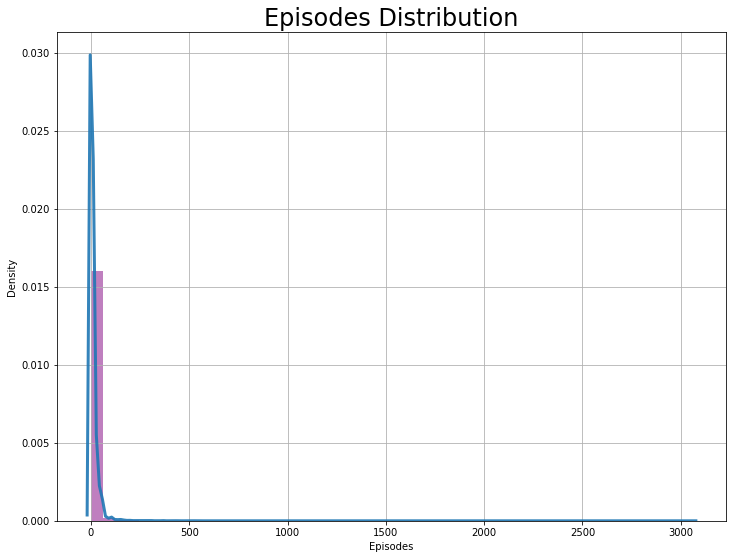

In [19]:
fig_kdeplot(anime_full, 'Episodes', 'Episodes Distribution')

seems like there are some outlier with really big number of episodes count meanwhile most show has under 200 episodes. Let's check for any outlier.

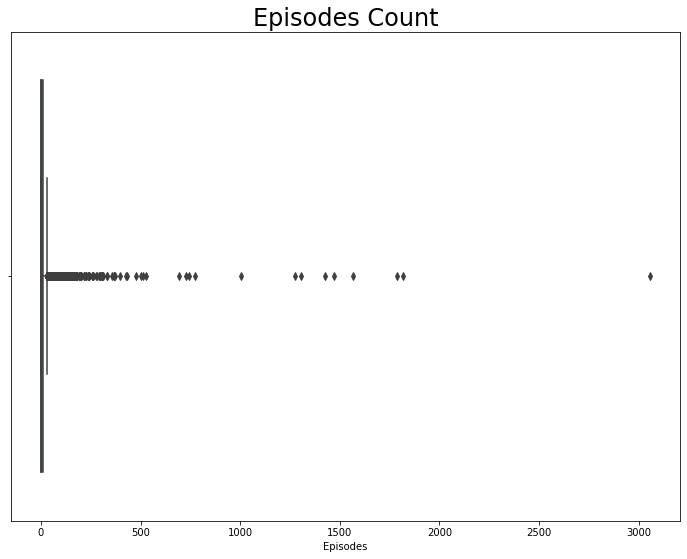

In [20]:
fig_boxplot(anime_full, 'Episodes', 'Episodes Count')

as expected, there're a lot outlier. There are a lot of anime running in insane amount of episodes. Lets see some of anime titles with the most epsodes number.

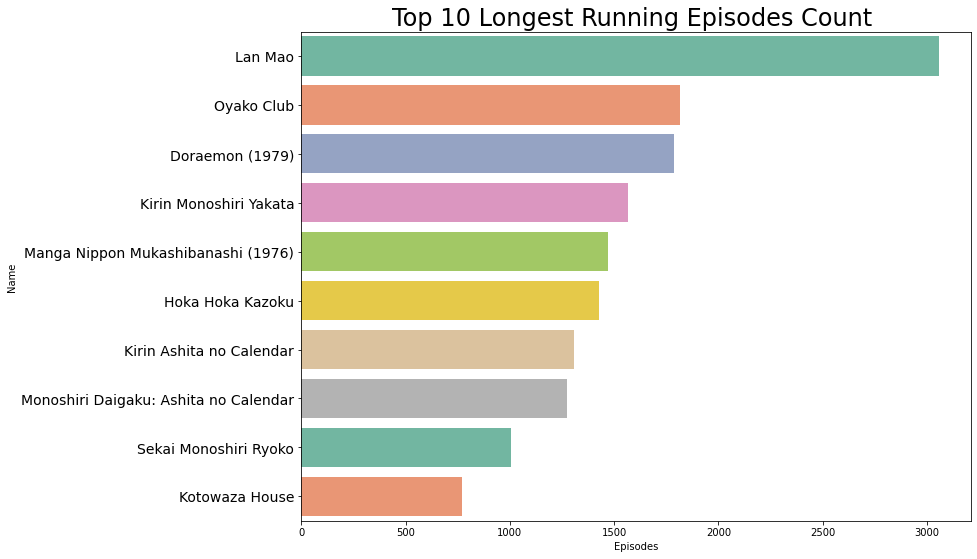

In [21]:
fig_topn_barplot(anime_full, 'Name', 'Episodes', 10, 'Top 10 Longest Running Episodes Count ')

anime with the biggest episodes count is Lan Mao with over 3000 episodes. Followed with Oyako Club and Doraemon with over 1700 episodes.

to see our distribution more clearly, lets plot without including the some of the outlier.

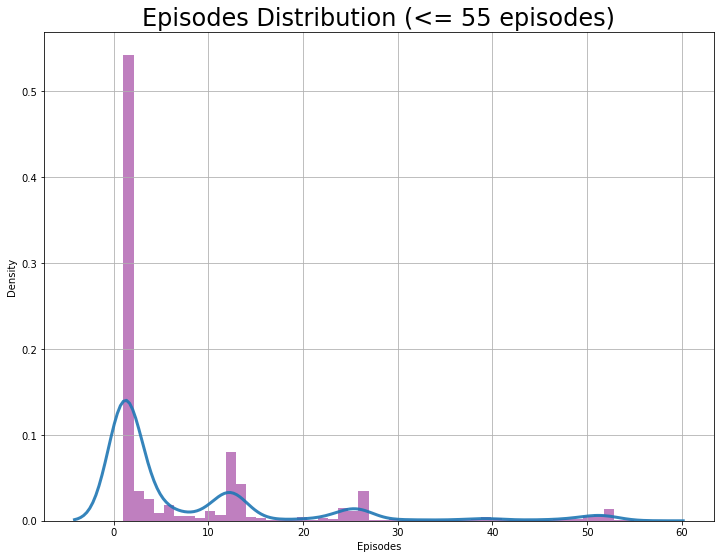

In [22]:
temp = anime_full[['Name', 'Episodes']]
temp.drop(temp[temp['Episodes'] > 55].index, inplace=True)
fig_kdeplot(temp, 'Episodes', 'Episodes Distribution (<= 55 episodes)')

most anime episodes ranged from 0-55, and as we can see, it’s not distributed normally. Let’s analyse this.

Anime with the most episode count is one episode. This due to anime with types of movie only have one episode. OVA, ONA, and music usually only have one episode as well. 

The next biggest episodes count is 12 and 13 This due to anime series usually shown per season, in which was 4 month or 12 weeks, and anime TV was broadcasted weekly so one season usually consist of 12-13 episodes. 

There are also big number of episodes count on 24, 25, and 26. This due to longer series that last 2 seasons with 24-26 episodes.

### Analysis on 'Producers', 'Licensors', and 'Studios'
Producers consist of comma seperated list of anime producers. 
Licensors consist of comma seperated list of anime licensors (broadcast license owner). 
Studios consist of comma seperated list of anime studio (studio that produces the anime). 
### Q: How Many Producers, Licensors, and Studios are there?

In [23]:
col_list = ['Producers', 'Licensors', 'Studios']
for i in col_list:
    print("///////////////////////")
    print(i + ": ")
    print(anime_full[i].value_counts())
    print("///////////////////////\n")

///////////////////////
Producers: 
[]                                                                                   7794
[NHK]                                                                                 623
[Pink Pineapple]                                                                      184
[Sanrio]                                                                              160
[Bandai Visual]                                                                       117
                                                                                     ... 
[Geneon Universal Entertainment, Warner Bros. Japan, ASCII Media Works, Showgate]       1
[Dentsu, Fuji TV, Asmik Ace, Sony Music Entertainment, Bungeishunjuu]                   1
[Shogakukan-Shueisha Productions, NHK, Animation 21]                                    1
[Shogakukan-Shueisha Productions, Bandai]                                               1
[Bushiroad, Bit grooove promotion]                              

most Producers, Licensors, and Studios are Unknown or nan

### Analysis on 'Source'
Source represent the Anime adaptation source (manga, light novel, etc). This because most anime was come from popular manga or other source before it adapted into an anime. There are also plenty amount of original anime or anime without any source.
### Q: What Source Anime mostly adapted from?

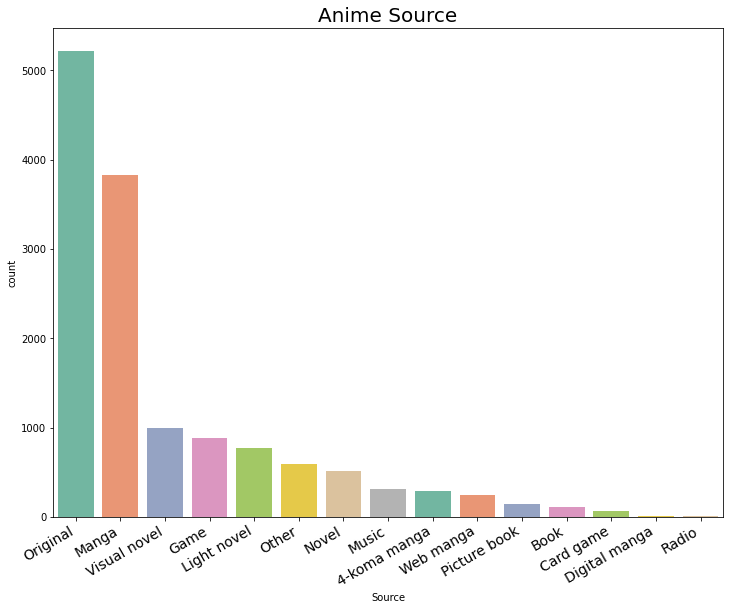

In [24]:
fig_countplot(anime_full, 'Source', True, 'Anime Source', True)

Most Anime was Original and adapted from Manga.

### Analysis on 'age_rating'
Rating represent age rating (PG, G, etc)
### Q: Was Anime a children show?

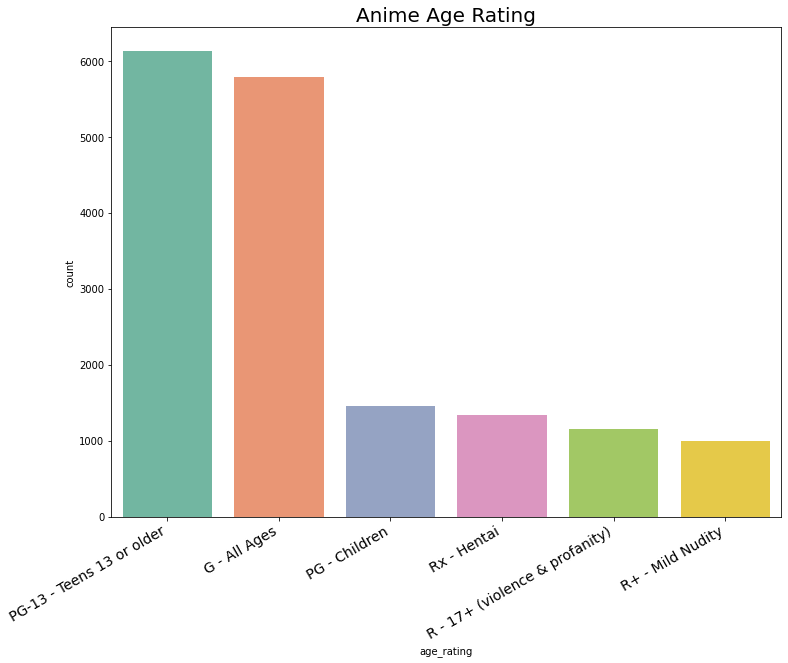

In [25]:
fig_countplot(anime_full, 'age_rating', True, 'Anime Age Rating', True)

Most anime rated PG-13, followed with All Ages. This makes most of anime marketed to teenager. 

PG-Children has a small number compared to other. This shown Anime was not completely a children show.

### Analysis on 'Ranked'
Ranked is rank Position based on Score
### Q: Whats the Top 10 Ranked Anime and its Score?

In [26]:
temp = anime_full.sort_values(by=['Ranked'], ascending=True)
temp.drop(temp[temp['Ranked'] < 1].index, inplace=True)
temp = temp[['Name', 'Ranked', 'Score']].head(10)
temp

,Name,Ranked,Score
3971,Fullmetal Alchemist: Brotherhood,1.0,9.19
15926,Shingeki no Kyojin: The Final Season,2.0,9.17
5683,Steins;Gate,3.0,9.11
14963,Shingeki no Kyojin Season 3 Part 2,4.0,9.10
9913,Gintama°,5.0,9.10
6474,Hunter x Hunter (2011),6.0,9.10
741,Ginga Eiyuu Densetsu,7.0,9.07
6006,Gintama',7.0,9.08
7261,Gintama': Enchousen,9.0,9.04
12898,3-gatsu no Lion 2nd Season,10.0,9.00


Top 1 anime ranked is  Fullmetal Alchemist: Brotherhood with the score of 9.19. Ranked anime stands for it Score, the higher the score, the higher the rank 

### Analysis on 'Popularity', 'Favorites', 'Members'
Popularity position based in the the number of users who have added the anime to their list.
### Q: Whats the Top 10 Popular Anime and its Favorites & Members counts? does they correspond to each other?

In [27]:
temp = anime_full.sort_values(by=['Popularity'], ascending=True)
temp.drop(temp[temp['Popularity'] < 1].index, inplace=True)
temp = temp[['Name', 'Popularity', 'Favorites', 'Members']].head(10)
temp

,Name,Popularity,Favorites,Members
1393,Death Note,1,145201,2589552
7449,Shingeki no Kyojin,2,129844,2531397
3971,Fullmetal Alchemist: Brotherhood,3,183914,2248456
6614,Sword Art Online,4,66342,2214395
10451,One Punch Man,5,54435,2123866
11185,Boku no Hero Academia,6,50005,1909814
8646,Tokyo Ghoul,7,45519,1895488
10,Naruto,8,65586,1830540
5683,Steins;Gate,9,148452,1771162
8148,No Game No Life,10,45990,1751054


Top 1 anime based on popularity is Death Note. 

It's seems like popularity doesn't really correspond to its favorite because 'Steins;Gate' on rank 9 has larger favorites count than the rank 4-8. 

Members in other hand show corresponding number to popularity rank, since the higher the number, the higher the rank.

Let's see top 10 anime based on Favorites and Members count

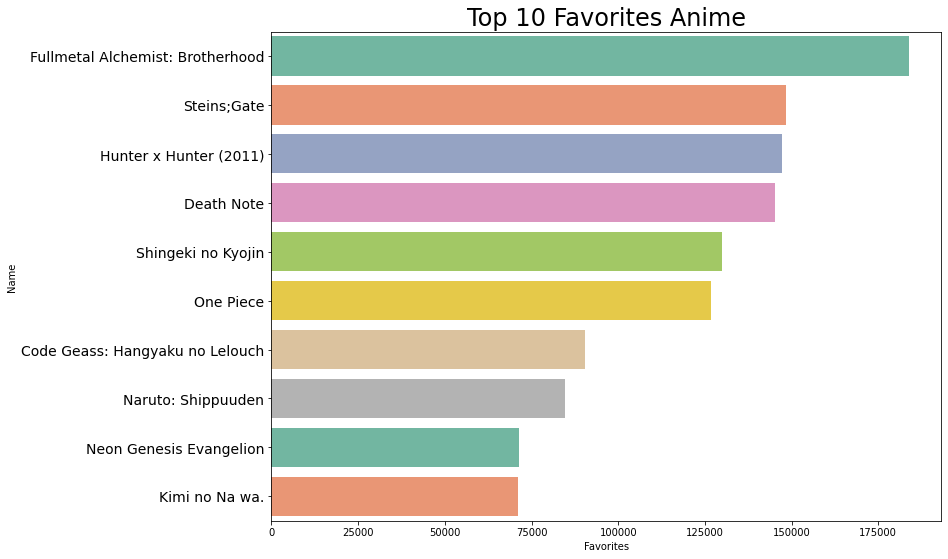

In [28]:
fig_topn_barplot(anime_full, 'Name', 'Favorites', 10, 'Top 10 Favorites Anime')

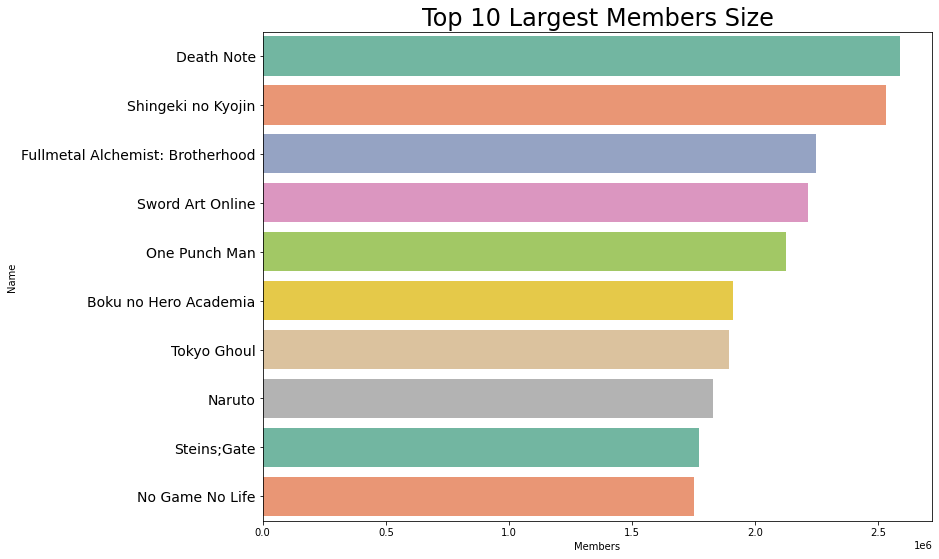

In [29]:
fig_topn_barplot(anime_full, 'Name', 'Members', 10, 'Top 10 Largest Members Size')

As we can see, 'Members' count correspond perfectly to 'Popularity'. This conclude 'Popularity' rank count comes from the members size.

### Analysis on 'rating'
rating is user given rating from user dataset for an anime ranged from 1 to 10
### Q: Whats the average rating that user give to anime? How's the distribution of rating?

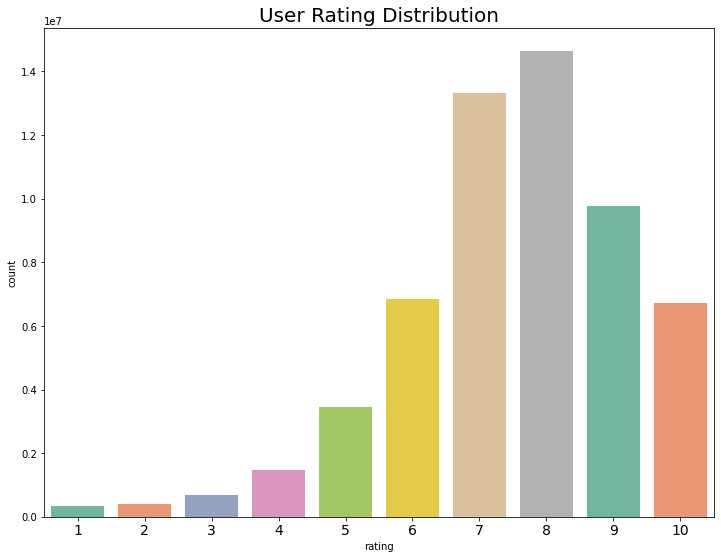

Average: 7.510788732162693


In [30]:
fig_countplot(rating_df, 'rating', False, 'User Rating Distribution', False)
printAvg(rating_df, 'rating')

user given rating averaged on 7.5 with mostly rate beteen 7-9

## ANALYSIS ON MERGED DF

In [31]:
# join anime_full and rating_df on anime_id
merged_df = pd.merge(anime_subset, rating_df, on='anime_id', how='outer')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57633968 entries, 0 to 57633967
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   anime_id    int64  
 1   Name        object 
 2   Score       float64
 3   Genres      object 
 4   Type        object 
 5   Studios     object 
 6   Source      object 
 7   age_rating  object 
 8   sypnopsis   object 
 9   user_id     float64
 10  rating      float64
dtypes: float64(3), int64(1), object(7)
memory usage: 5.2+ GB


In [32]:
# function to print selected column of dataframe
def show_half(df, col_list):
    temp = df[col_list]
    print(temp)

### TOP 10 POPULAR ANIME
lets see most popular anime with data counted from user_rating
### Q: Whats the top 10 popular anime based on user_rating, is it the same as top 10 anime based on 'Ranked'?

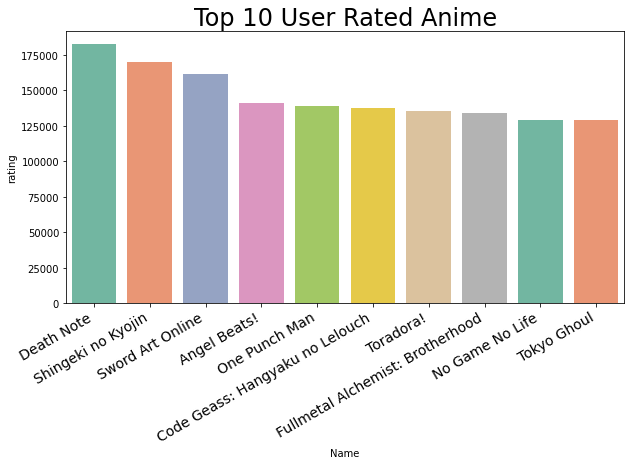

In [33]:
temp = pd.DataFrame(merged_df.groupby('Name')['rating'].count().sort_values(ascending=False))
temp = temp.reset_index().head(10)

fig = plt.figure(figsize=(10,5))
fig.set_facecolor('white')
ax = sns.barplot(data=temp, x='Name', y='rating', palette='Set2')
ax.set_title('Top 10 User Rated Anime', fontsize=24)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=14)
plt.show()

we can see there's some different to the rank we get using 'Ranked' feature earlier. lets see its Score for this new ranking.

In [34]:
temp = pd.merge(temp, anime_full, on='Name', how='left')
show_half(temp, ['Name', 'rating', 'Score'])

                               Name  rating  Score
0                        Death Note  182375   8.63
1                Shingeki no Kyojin  169794   8.48
2                  Sword Art Online  161192   7.25
3                      Angel Beats!  141127   8.15
4                     One Punch Man  138924   8.57
5   Code Geass: Hangyaku no Lelouch  137291   8.72
6                         Toradora!  135524   8.24
7  Fullmetal Alchemist: Brotherhood  134197   9.19
8                   No Game No Life  129009   8.20
9                       Tokyo Ghoul  128822   7.81


Score doesn't correspond to user_rating, some Score on lower rank has bigger number then higher rank. This is why there're some different to the top 10 anime by 'Ranked'. The reasons is the dataset on 'rating.csv' was only a part/subset of scrapped data from MAL. Meanwhile 'Ranked' on 'anime.csv' contain Ranked calculated from scores form all users by MAL. 

Let's compare current list wits its Ranked number

In [35]:
show_half(temp, ['Name', 'rating', 'Score','Ranked'])

                               Name  rating  Score  Ranked
0                        Death Note  182375   8.63    60.0
1                Shingeki no Kyojin  169794   8.48   115.0
2                  Sword Art Online  161192   7.25  2584.0
3                      Angel Beats!  141127   8.15   354.0
4                     One Punch Man  138924   8.57    81.0
5   Code Geass: Hangyaku no Lelouch  137291   8.72    39.0
6                         Toradora!  135524   8.24   265.0
7  Fullmetal Alchemist: Brotherhood  134197   9.19     1.0
8                   No Game No Life  129009   8.20   304.0
9                       Tokyo Ghoul  128822   7.81   807.0


The rank position is so differ, there're even rank 2584 in the top 10.

Now let's compare with top 10 Ranked side to side.

In [36]:
print("Top 10 Anime 'user_rating'")
show_half(temp, ['Name'])

print("\n/////////////////////////////")
print("Top 10 Anime 'Ranked'\n")
temp = anime_full.sort_values(by=['Ranked'], ascending=True)
temp.drop(temp[temp['Ranked'] < 1].index, inplace=True)
temp = temp.head(10)
show_half(temp, ['Name'])

Top 10 Anime 'user_rating'
                               Name
0                        Death Note
1                Shingeki no Kyojin
2                  Sword Art Online
3                      Angel Beats!
4                     One Punch Man
5   Code Geass: Hangyaku no Lelouch
6                         Toradora!
7  Fullmetal Alchemist: Brotherhood
8                   No Game No Life
9                       Tokyo Ghoul

/////////////////////////////
Top 10 Anime 'Ranked'

                                       Name
3971       Fullmetal Alchemist: Brotherhood
15926  Shingeki no Kyojin: The Final Season
5683                            Steins;Gate
14963    Shingeki no Kyojin Season 3 Part 2
9913                               Gintama°
6474                 Hunter x Hunter (2011)
741                    Ginga Eiyuu Densetsu
6006                               Gintama'
7261                    Gintama': Enchousen
12898            3-gatsu no Lion 2nd Season
